# Worksheet 18

Name:  Sumatra Dhimoyee

UID: U26967910

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

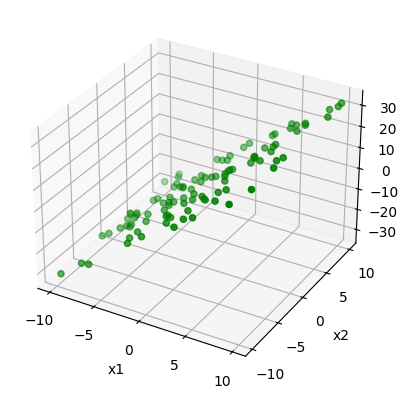

In [3]:
import numpy as np
import matplotlib.pyplot as plt


SAMPLE_SIZE = 100

x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2


fig = plt.figure()


ax = fig.add_subplot(111,projection='3d')

ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

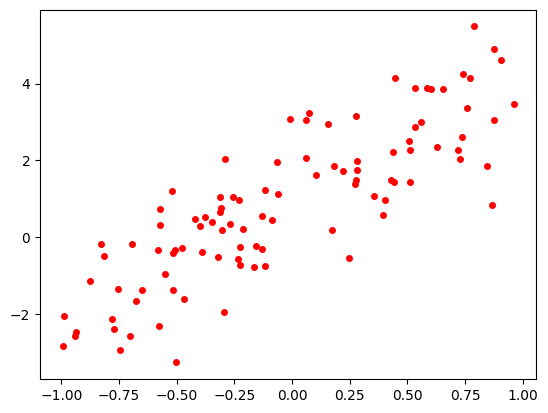

In [4]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1 , 3])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

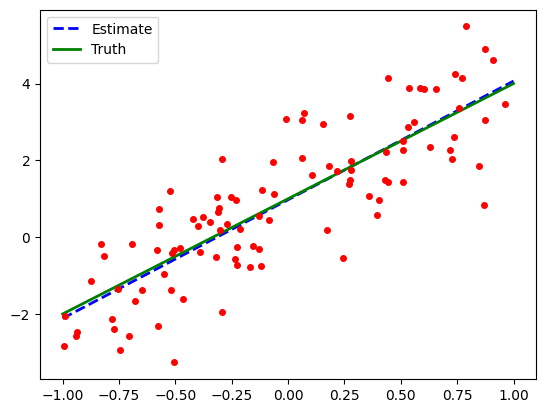

In [5]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate beta is closer to the values of the generated data.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

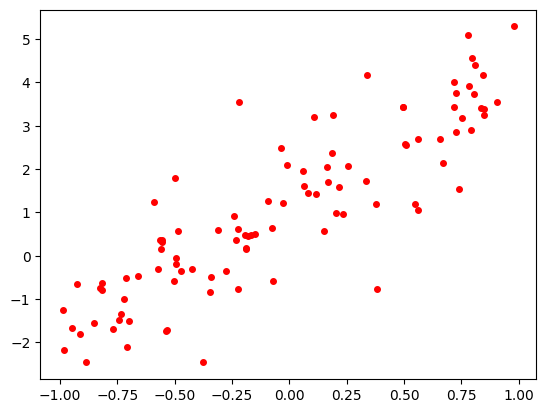

In [6]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3, 0.5 ])
x = -1 + 2 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

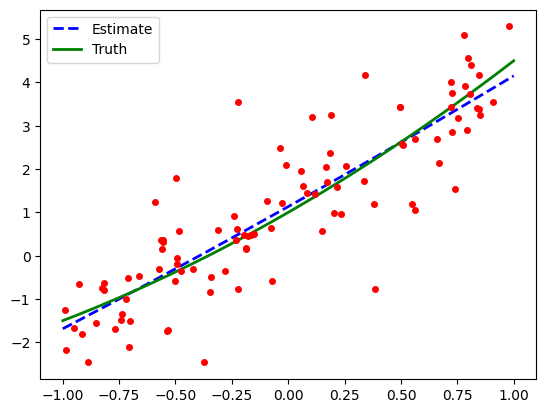

[1.13334078 2.92016893 0.09962727]
[1.  3.  0.5]


In [7]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x*x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

print(beta_hat)
print(true_beta)

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

It is closer compared to the first graph.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

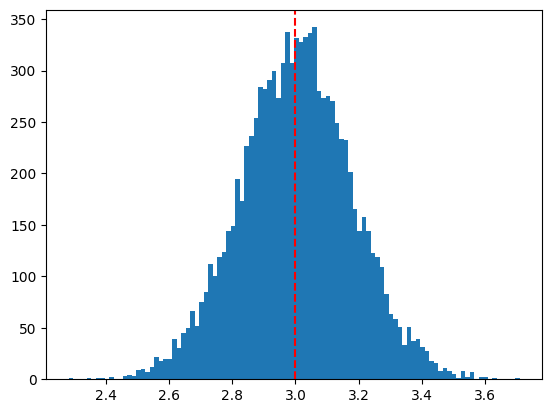

In [8]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 1,3 ,0.5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2]*x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x,x**2]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()

Optional Challenge

In [11]:
import pandas as pd
data = pd.read_csv('data.csv')
def time_to_seconds(time_str):
    parts = time_str.split(':')
    return int(parts[0]) * 3600 + int(parts[1]) * 60 + int(parts[2])

data['alarm (%H:%M:%S)'] = data['alarm (%H:%M:%S)'].apply(time_to_seconds)
data

,day,alarm (%H:%M:%S)
0,1,0
1,2,40883
2,3,64799
3,4,81767
4,5,8529
...,...,...
350,351,87
351,352,253
352,353,422
353,354,587


Predicted alarm time for day 356: 20:52:44


/Users/sumatradhimoyee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


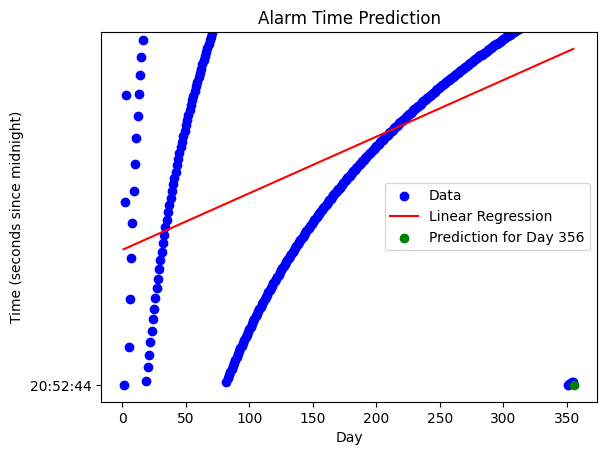

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# data
X = data[['day']]  # Features (day numbers)
y = data['alarm (%H:%M:%S)']   # Target (alarm times)

# lr model
model = LinearRegression()

# train
model.fit(X, y)

# alarm time
day_356 = [[356]]
predicted_alarm_time = model.predict(day_356)

def seconds_to_time(seconds):
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return '{:02d}:{:02d}:{:02d}'.format(int(hours), int(minutes), int(seconds))

print("Predicted alarm time for day 356:", seconds_to_time(predicted_alarm_time[0]))
predicted_time=seconds_to_time(predicted_alarm_time[0])

# lse
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.scatter(356, predicted_time, color='green', label='Prediction for Day 356')
plt.xlabel('Day')
plt.ylabel('Time (seconds since midnight)')
plt.title('Alarm Time Prediction')
plt.legend()
plt.show()
